In [29]:
# Import modules
import numpy as np
import time, os, sys, random
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
from cellpose import models
from cellpose.io import imread
from cellpose import plot
from skimage.util import img_as_ubyte
import pandas as pd

#------------------------------------------------------
nb_images = 12

# Get path to folders containing images
#Image_Directory = os.getcwd() + "\\20151218_E14_BM_mTF8additionals_4"
Image_Directory = r"C:\Users\alexi\EPFL\MA3\Machine_learning\20151218_E14_BM_mTF8additionals_4"  #Easier for me (Alexis) than finding of to get my path file nicely
# other folders: 
# \\20151218_E14_BM_mTF8additionals_4
# "//20151125_BM_mTF8additionals_3//Composite_mBM-mTF8"
print(Image_Directory)


# Create Lists containing datapath to all images of Cherry/ Ypet files
image_format = "tif"
cherry_condition = "TexasRed"
ypet_condition = "YFP"
Cherry_file = np.empty(12, dtype=object)
Ypet_file = np.empty(12, dtype=object)


# Walk through directory (call all files) and assign them to proper list
for root, dirs, files in os.walk(Image_Directory, topdown=False): # root = given in Input, dirs = folders, files= files
    c_i = 0
    y_i = 0
    for f in files:
        if f.endswith(image_format) and cherry_condition in f: 
            Cherry_file[c_i] = os.path.join(root, f)
            c_i = c_i+1
        elif f.endswith(image_format) and ypet_condition in f: 
            Ypet_file[y_i] = os.path.join(root, f)
            y_i = y_i+1

assert len(Cherry_file) == len(Ypet_file), f"There are {len(Cherry_file)} Cherry files and {len(Ypet_file)} Ypet files. The number has to be equal, check manually what's missing"


# Initialize lists containing cherry, ypet images
cherry_imgs = np.ndarray(nb_images,dtype = np.ndarray)
ypet_imgs = np.ndarray(nb_images,dtype = np.ndarray)


# Read image (We donnot add it in for loop above to enable reading subset of image)
for i in range(nb_images): #len(Cherry_file):
    cherry_imgs[i] = imread(Cherry_file[i])
    ypet_imgs[i] = imread(Ypet_file[i])
    
cherry_imgs = cherry_imgs.tolist()
ypet_imgs = ypet_imgs.tolist()

print(len(cherry_imgs))

C:\Users\alexi\EPFL\MA3\Machine_learning\20151218_E14_BM_mTF8additionals_4
12


In [30]:
# Definine parameters for cellpose module using nuclei modus
# https://cellpose.readthedocs.io/en/latest/settings.html
channels = [0,0] # Corresponds to greyscale image
diameter = None # Model was trained on diameters of 17 pixels. None-> automated estimation of the diameter. Can be changed by hand later
flow_threshold = 0.4 # maximum allowed error of the flows for each mask, default = 0.4
gpu = False
model_type='nuclei'

# Set model
model = models.Cellpose(gpu, model_type)

# Nuclei segmentation of all images within cherry_imgs list
masks, flows, styles, diams = model.eval(cherry_imgs, diameter=diameter, channels=channels, flow_threshold=flow_threshold, do_3D=False)





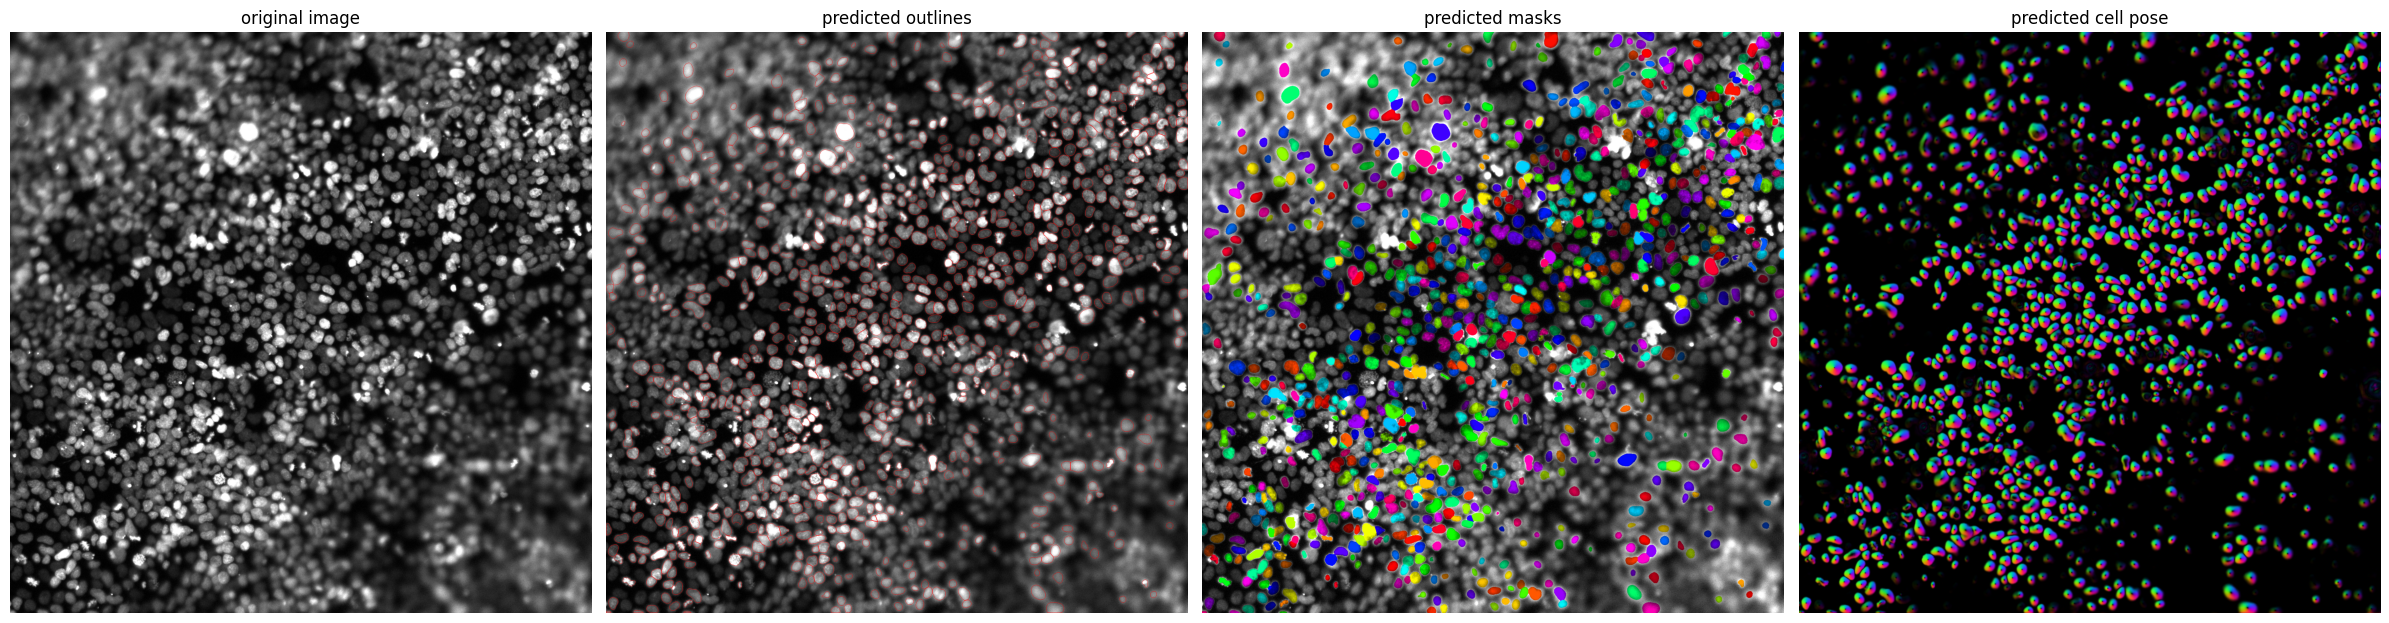

In [31]:
# Display results
image_i = 0
fig = plt.figure(figsize=(24,8))
plot.show_segmentation(fig, cherry_imgs[image_i], masks[image_i], flows[image_i][0], channels)
plt.tight_layout()
plt.show()

In [ ]:
# Try with first image: masks[0]
columnname = ["" for i in range(1)]
patch_size = [0 for i in range(1)]
mean_intensity = [0 for i in range(1)]
sum_intensity = [0 for i in range(1)]
median_intensity = [0 for i in range(1)]
variance_intensity = [0 for i in range(1)]
imgs = [-1 for i in range(1)]
ypet_intensity_glob = pd.DataFrame(index=columnname)
ypet_intensity_glob['patch_size'] = patch_size
ypet_intensity_glob['mean_intensity'] = mean_intensity
ypet_intensity_glob['sum_intensity'] = sum_intensity
ypet_intensity_glob['median_intensity'] = median_intensity
#ypet_intensity_glob['variance_intensity'] = variance_intensity
ypet_intensity_glob['img'] = imgs

    
for j in range(nb_images):
    masks_df =  pd.DataFrame(masks[j])   #Putting 1 here (when test_round = 2 completely changes the results)
    ypet_df = pd.DataFrame(ypet_imgs[j])
    range_s = range(masks_df.nunique().size)  #IMAGE SPECIFIC: cases where cell are big enough (sell last cell of the notebook)
    columnname = ["" for i in range_s]
    patch_size = [0 for i in range_s]
    mean_intensity = [0 for i in range_s]
    sum_intensity = [0 for i in range_s]
    median_intensity = [0 for i in range_s]
    #variance_intensity = [0 for i in range_s]
    imgs = [j for i in range_s]
    
    assert masks_df.shape == ypet_df.shape, f"Shape of mask is {masks_df.shape} and the shape of ypet image is { ypet_df.shape}. The size has to be the same. Check if normalization is needed"

    # Calculate patch size and corresponding ypet signal (mean) and store it into ypet_intensity
    for i in range_s : # masks_df.nunique().size 
        mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
        columnname[i] = "patch_" + str(i)                             #We should not forgot that there is a -1 here. (when it is here)               
        patch_size[i] = (masks_df == i).values.sum()
        sum_intensity[i] = np.sum(ypet_df[masks_df==i])
        median_intensity[i] = np.nanmedian(ypet_df[masks_df==i])
        #variance_intensity[i] = np.var(ypet_df[masks_df==i])
    ypet_intensity = pd.DataFrame(index=columnname)
    ypet_intensity['patch_size'] = patch_size
    ypet_intensity['mean_intensity'] = mean_intensity
    ypet_intensity['sum_intensity'] = sum_intensity
    ypet_intensity['median_intensity'] = median_intensity
    #ypet_intensity['variance_intensity'] = variance_intensity
    ypet_intensity['img'] = imgs
    ypet_intensity_glob = pd.concat([ypet_intensity_glob,ypet_intensity])
    print("step "+str(j)+" over "+str(nb_images)+ " is done!")
    

C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 0 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 1 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 2 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 3 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 4 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 5 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


step 6 over 12 is done!


C:\Users\alexi\AppData\Local\Temp\ipykernel_15388\3828967263.py:34: RuntimeWarning: Mean of empty slice
  mean_intensity[i] = np.nanmean(ypet_df[masks_df==i])
C:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [33]:
ypet_intensity_glob.to_csv(r"C:\Users\alexi\EPFL\MA3\Machine_learning\20151218_E14_BM_mTF8additionals_4\features_cells_A1.csv")



In [38]:
ypet_intensity_glob.to_excel(r"C:\Users\alexi\EPFL\MA3\Machine_learning\20151218_E14_BM_mTF8additionals_4\features_cells_A1.xlsx")



